In [40]:
import igraph as ig
import collections
import matplotlib.pyplot as plt


g = ig.read("binet-AMZ-Rw.graphml")

print(g.summary())

IGRAPH U-WT 17079 32769 -- 
+ attr: freq (v), id (v), type (v), weight (e)


/Users/ddiaz/Documents/code/envs/tesis/lib/python3.10/site-packages/igraph/io/files.py:295: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:488
  return reader(f, *args, **kwds)


In [41]:
u_nodes = g.vs.select(type=0)
print(len(u_nodes))
v_nodes = g.vs.select(type=1)
print(len(v_nodes))

9561
7518


In [42]:
len(g.degree(u_nodes))

9561

In [43]:
def plot_degree_distribution(degrees, degrees2):
    """
    Grafica la distribución de grados de una lista de grados de vértices.

    Args:
        degrees (list): Una lista de números enteros representando los grados de cada vértice.
    """
    if not degrees:
        print("La lista de grados está vacía. No se puede generar el gráfico.")
        return

    # Contar la frecuencia de cada grado
    degree_counts = collections.Counter(degrees)
    degree_counts2 = collections.Counter(degrees2)

    # Separar los grados únicos y sus frecuencias
    degree_values = sorted(degree_counts.keys())
    degree_values2 = sorted(degree_counts2.keys())

    counts = [degree_counts[d] for d in degree_values]
    counts2 = [degree_counts2[d] for d in degree_values2]

    # Crear el gráfico de línea con puntos
    plt.figure(figsize=(5, 5))
    # 'o-' significa puntos ('o') conectados por una línea ('-')
    plt.plot(degree_values, counts, marker='o', linestyle="", color='coral', linewidth=2, markersize=8)
    #plt.plot(degree_values2, counts2, marker='o', linestyle="", color='red', linewidth=2, markersize=8)

    # Añadir etiquetas y título
    plt.title('Distribución de Grados de Vértices (Línea y Puntos)')
    plt.xlabel('Grado del Vértice')
    plt.ylabel('Número de Vértices')
    plt.loglog()
    plt.xticks(degree_values) # Asegura que todos los grados únicos se muestren en el eje X
    plt.xticks(degree_values2) # Asegura que todos los grados únicos se muestren en el eje X
    plt.grid(True, linestyle='--', alpha=0.7) # Añadir una cuadrícula completa

    # Mostrar el gráfico
    plt.show()

    # Mostrar el gráfico
    plt.show()

In [18]:
max(g.degree(u_nodes))

36

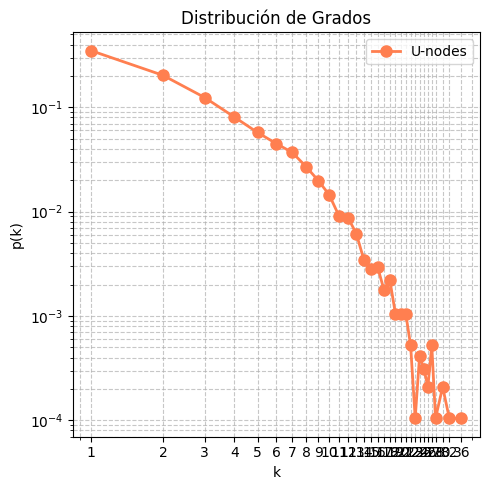

In [57]:
plot_degree_distribution_log_norm(g.degree(u_nodes))

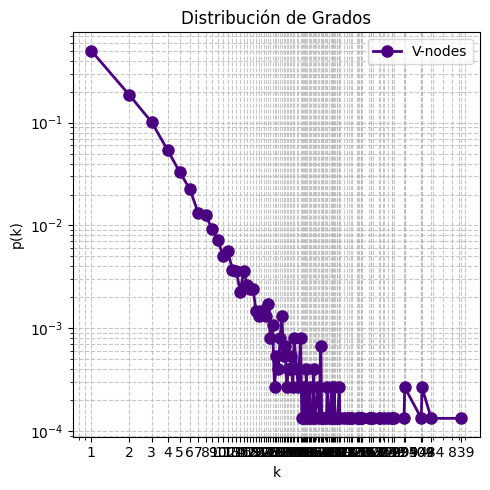

In [53]:
plot_degree_distribution_log_norm(g.degree(v_nodes))

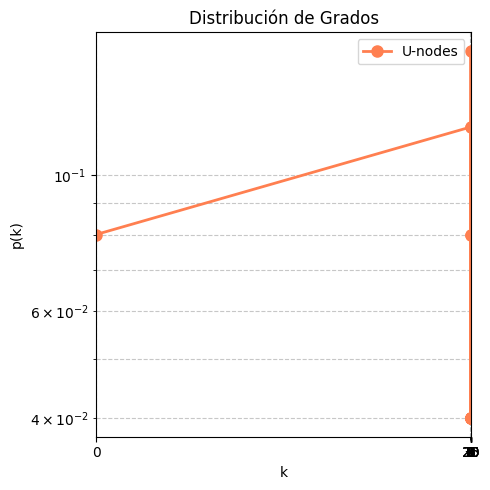

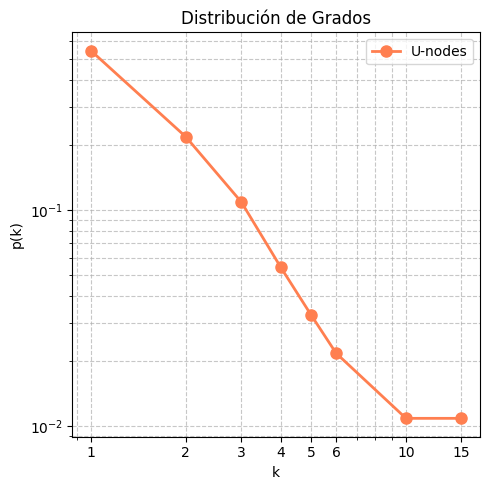

La lista de grados está vacía. No se puede generar el gráfico.


In [56]:
import matplotlib.pyplot as plt
import collections
import numpy as np # Importamos numpy para manejo de arrays y cálculos numéricos

def plot_degree_distribution_log_norm(degrees):
    """
    Grafica la distribución de grados de una lista de grados de vértices
    como una línea continua con puntos, con el eje vertical normalizado entre 0 y 1,
    y ambos ejes en escala logarítmica.

    Args:
        degrees (list): Una lista de números enteros representando los grados de cada vértice.
    """
    if not degrees:
        print("La lista de grados está vacía. No se puede generar el gráfico.")
        return

    # Contar la frecuencia de cada grado
    degree_counts = collections.Counter(degrees)

    # Separar los grados únicos y sus frecuencias
    degree_values = sorted(degree_counts.keys())
    counts = [degree_counts[d] for d in degree_values]

    # --- Normalizar las frecuencias ---
    total_vertices = len(degrees)
    # Evitar división por cero si la lista está vacía (ya manejado arriba, pero buena práctica)
    if total_vertices == 0:
        print("No hay vértices para normalizar.")
        return

    # Calcular la probabilidad o frecuencia relativa de cada grado
    # Convertir a array de numpy para facilitar la división
    normalized_counts = np.array(counts) / total_vertices

    # --- Crear el gráfico de línea con puntos ---
    plt.figure(figsize=(5, 5))

    # 'o-' significa puntos ('o') conectados por una línea ('-')
    plt.plot(degree_values, normalized_counts,
             marker='o', linestyle='-', color='coral',
             linewidth=2, markersize=8, label='U-nodes')

    # --- Configurar escalas logarítmicas ---
    plt.xscale('log')
    plt.yscale('log')

    # Añadir etiquetas y título
    plt.title('Distribución de Grados')
    plt.xlabel('k')
    plt.ylabel('p(k)')

    # Mejorar la visibilidad de los ticks en el eje X para escalas logarítmicas
    # Solo mostrar ticks para los grados que realmente existen
    plt.xticks(degree_values, [str(d) for d in degree_values])

    plt.grid(True, linestyle='--', alpha=0.7, which="both") # Añadir una cuadrícula completa para ambas escalas
    plt.legend() # Mostrar la leyenda
    plt.tight_layout() # Ajustar el layout para evitar solapamientos
    plt.show()

# --- Ejemplo de uso ---
if __name__ == "__main__":
    # Ejemplo de una lista de grados con un rango variado para mejor visualización logarítmica
    my_degrees = [1, 2, 2, 3, 1, 4, 4, 4, 5, 5, 5, 5, 0, 0, 1, 6, 7, 8, 9, 10, 10, 15, 20, 25, 30]
    plot_degree_distribution_log_norm(my_degrees)

    # Otro ejemplo con una distribución que podría parecer más de ley de potencia
    # (muchos nodos con pocos grados, pocos nodos con muchos grados)
    power_law_like_degrees = [1]*50 + [2]*20 + [3]*10 + [4]*5 + [5]*3 + [6]*2 + [10]*1 + [15]*1
    plot_degree_distribution_log_norm(power_law_like_degrees)

    # Ejemplo con una lista vacía
    empty_degrees = []
    plot_degree_distribution_log_norm(empty_degrees)

Calculating best minimal value for power law fit
Alpha: 2.155s: 99%
xmin: 4.0


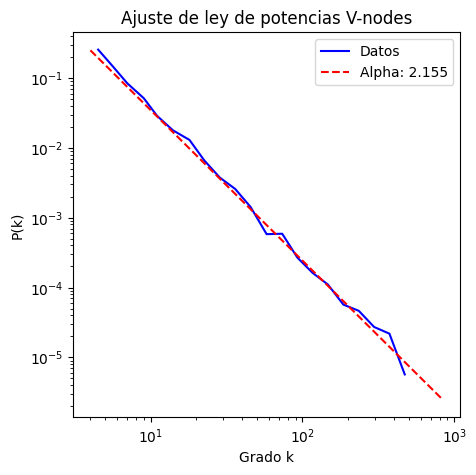

In [64]:
import powerlaw
# Ajustar la distribución
fit = powerlaw.Fit(g.degree(v_nodes), discrete=True)

# Estimar alpha y xmin
alpha = fit.alpha
xmin = fit.xmin

print(f"Alpha: {alpha:.3f}")
print(f"xmin: {xmin}")

# Visualizar el ajuste
plt.figure(figsize=(5, 5))
fig = fit.plot_pdf(color='b', label='Datos')
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig, label=f"Alpha: {alpha:.3f}")
plt.legend()
plt.xlabel('Grado k')
plt.ylabel('P(k)')
plt.title('Ajuste de ley de potencias V-nodes')
plt.show()

Calculating best minimal value for power law fit
Alpha: 3.855s: 96%
xmin: 8.0


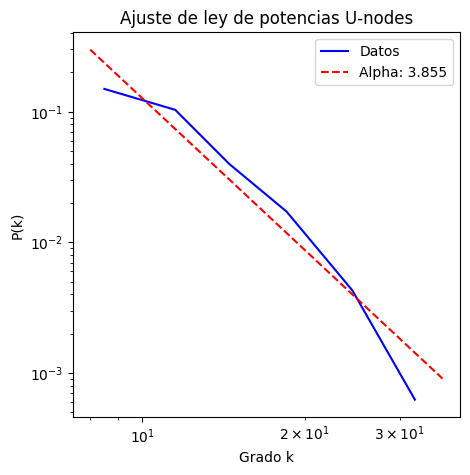

In [65]:
import powerlaw
# Ajustar la distribución
fit = powerlaw.Fit(g.degree(u_nodes), discrete=True)

# Estimar alpha y xmin
alpha = fit.alpha
xmin = fit.xmin

print(f"Alpha: {alpha:.3f}")
print(f"xmin: {xmin}")

# Visualizar el ajuste
plt.figure(figsize=(5, 5))
fig = fit.plot_pdf(color='b', label='Datos')
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig, label=f"Alpha: {alpha:.3f}")
plt.legend()
plt.xlabel('Grado k')
plt.ylabel('P(k)')
plt.title('Ajuste de ley de potencias U-nodes')
plt.show()